## Переобучение. Борьба с переобучением и регуляризация

Задача модели машинного обучения сводится не просто к обучению на тренировочных выборках, а к получению максимальной обобщающей способности. Обобщающая способность - это фактически величина, обратная вероятности допустить ошибку при классификации или регрессии на новом объеме данных. Обобщающую способность можно оценить только на выборке, которую ранее не использовала модель для обучения. Именно поэтому в машинном обучении принято разделять выборку на **обучающую** и **тестовую**. На *обучающей выборке* модель обучается, а на тестовой проверяются метрики качества, которые и характеризуют обобщающую способность.

В теории статистического машинного обучения есть понятие **емкости** или **сложности** модели: можно сказать, что сложность - это способность модели аппроксимировать данные обучющей выборки. Для задачи бинарной классификации введем более формальное определение: *емкость модели - величина, равная максимальному числу точек, для которых любое подмножество и дополнение к нему разделимы*. Рассмотрим, например, три точки на плоскости:
![](3.png?raw=true)

Очевидно, как бы мы не подкрашивали точки в синий и красный цвета, найдется прямая линия, котора отделит красные от синих точек. 

Рассмотрим, однако, четыре точки:
![](4.png?raw=true)
Также очевидно, что не существует никакой прямой линии, которая бы отделила красные от синих точек (это так назыаемая XOR-проблема, о которой пойдет речь во введении в нейронные сети). Сразу заключаем, что емкость линейного классификатора на плоскости равна 3. Можно показать, что для признакового пространства размерности N емкость линейного классификатора равно N+1. 

Также известно соотношение между обобщающей способностью и сложностью модели. Не приводя формул, скажем, что чем больше сложность (емкость) модели, тем ниже обобщающая способность. Вывод этот не должен показаться странным: максимально емкая модель просто запоминает тренировочные данные (обучающую выборку) и поэтому не ищет никаких закономерностей в данных.


В связи с этим в машинном обучении есть две проблемы: **переобучение** и **недообучение**. Обе они связаны, как можно догадаться, со сложностью модели. Слишком простые (неемкие) модели могут выделить лишь незначительное число взаимосвязей в данных, слишком сложные (емкие) модели, как уже было отмечено, могут запомнить обучающую выборку, а на новых данных вести себя произвольно, даже если тестовая выборка лишь незначительно отличается от обучающей.

Отсюда можно сразу сделать вывод, что недообучение можно побороть увеличением емкости модели. С переобучением все немного сложнее.

Здесь мы продемонстрируем явления переобучения и недообучения на примерах задачи регресии и классификации, а также укажем на средства борьбы с переобучением при помощи регуляризации.

#### Линейная регрессия

In [1]:
from classification_helper import * # Подгружаем функции
from sklearn.linear_model import LogisticRegression
import numpy as np

In [50]:
X,y = get_regress_data() # подготовленные данные для регрессии

Отобразим данные

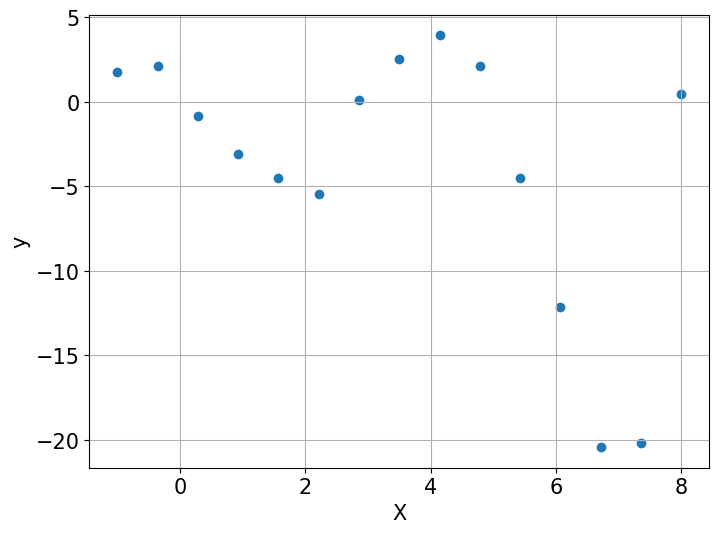

In [51]:
plot_regress_data(X,y)

Разобьем данные на обучающую и тестовую выборки. Сделать это можно при помощи библиотеки *scikit-learn*.

In [52]:
from sklearn.model_selection import train_test_split

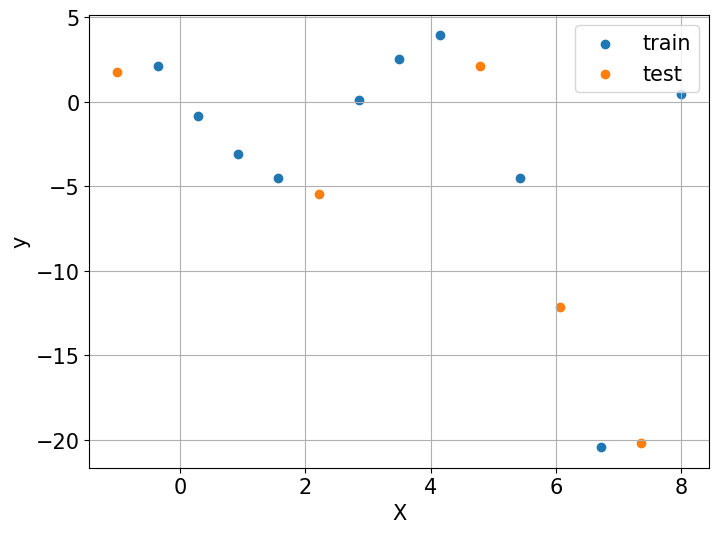

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plot_regress_train_test_data(X_train, X_test, y_train, y_test)

Обучим линейную регрессию и посмотрим ошибки на тестовой и обучающей выборках

In [54]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [55]:
lr = linear_model.LinearRegression()
std = StandardScaler()

In [56]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
lr.fit(X_train_std,y_train)
y_pred_test = lr.predict(X_test_std)
y_pred_train = lr.predict(X_train_std)

In [57]:
print("MSE на тесте",mean_squared_error(y_test, y_pred_test))
print("MSE на обучении",mean_squared_error(y_train,y_pred_train))

MSE на тесте 60.35535230021602
MSE на обучении 37.8646094057688


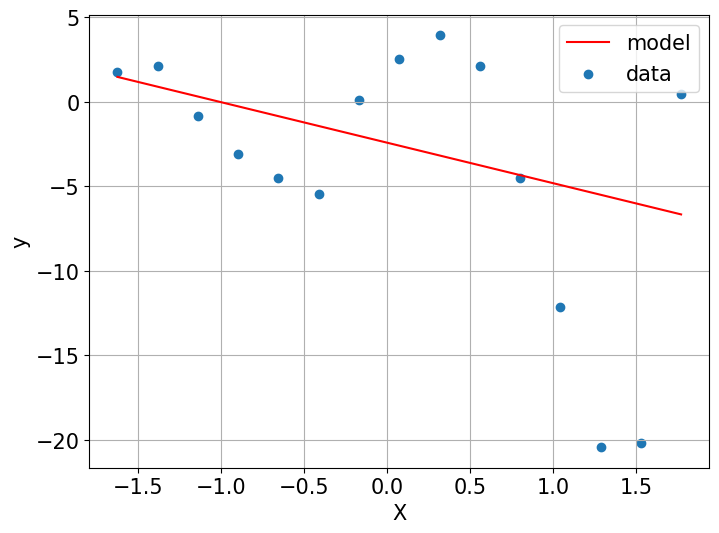

In [58]:
plot_regress_data_and_model(std.transform(X),y,lr)

Проблема видна сразу, модель слишком простая, типичный пример *недообучения*. Следует добавить еще, например, полиномиальных признаков. Но сколько их добавить?

Попробуем воспользоваться следующей идеей, будем увеличивать степень многочлена, пока точность нас не устроит.

In [59]:
N = 15
TRAIN = []
TEST = []
for i in range(1,N+1):
    X_poly_train = creat_polynomial_features(X_train,i)
    X_poly_test = creat_polynomial_features(X_test,i)
    
    X_train_std = std.fit_transform(X_poly_train)
    X_test_std = std.transform(X_poly_test)
    
    lr = linear_model.LinearRegression()
    lr.fit(X_poly_train,y_train)
    
    y_pred_test = lr.predict(X_poly_test)
    y_pred_train = lr.predict(X_poly_train)
    
    print(10*"*")
    print("Степень полинома:", i)
    print("MSE на тесте",mean_squared_error(y_test, y_pred_test))
    print("MSE на обучении",mean_squared_error(y_train,y_pred_train))
    TEST.append(mean_squared_error(y_test, y_pred_test))
    TRAIN.append(mean_squared_error(y_train,y_pred_train))
    

**********
Степень полинома: 1
MSE на тесте 60.35535230021603
MSE на обучении 37.86460940576879
**********
Степень полинома: 2
MSE на тесте 60.35535230021603
MSE на обучении 37.864609405768796
**********
Степень полинома: 3
MSE на тесте 58.07030356885882
MSE на обучении 37.60621383421285
**********
Степень полинома: 4
MSE на тесте 69.70747129740272
MSE на обучении 34.87342522675003
**********
Степень полинома: 5
MSE на тесте 112.7125824551437
MSE на обучении 6.977945105955892
**********
Степень полинома: 6
MSE на тесте 3.952174595280529
MSE на обучении 0.05593968485233752
**********
Степень полинома: 7
MSE на тесте 1.609722656029561
MSE на обучении 0.027917556313493956
**********
Степень полинома: 8
MSE на тесте 2.175622836503704
MSE на обучении 0.024586213376336975
**********
Степень полинома: 9
MSE на тесте 13.593998291861885
MSE на обучении 0.021700576037110765
**********
Степень полинома: 10
MSE на тесте 697.90126575586
MSE на обучении 1.5329228761996193e-16
**********
Степень поли

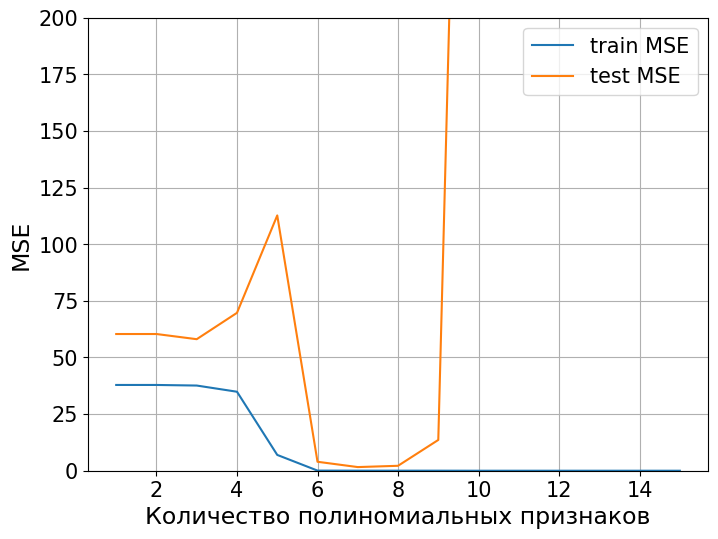

In [60]:
plot_train_test_mse(TRAIN,TEST)

Интересная картина:
* При низкой степени полинома ошика большая на трейне и на тесте (пример недообучения)
* При степени полинома от 6 до 8 ошибка на трейне и тесте не слишком отличается, пример приемлевого обучения
* При степени полинома выше 11, ошибка на трейне не перестает уменьшаться, а на отложенной выборке становится очень большой. Типичный пример переобучения.

Построим модель с высокой степенью полинома и посмотрим в чем дело


In [61]:
N = 15
X_poly_train = creat_polynomial_features(X_train,N)
X_poly_test = creat_polynomial_features(X_test,N)

X_train_std = std.fit_transform(X_poly_train)
X_test_std = std.transform(X_poly_test)

lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

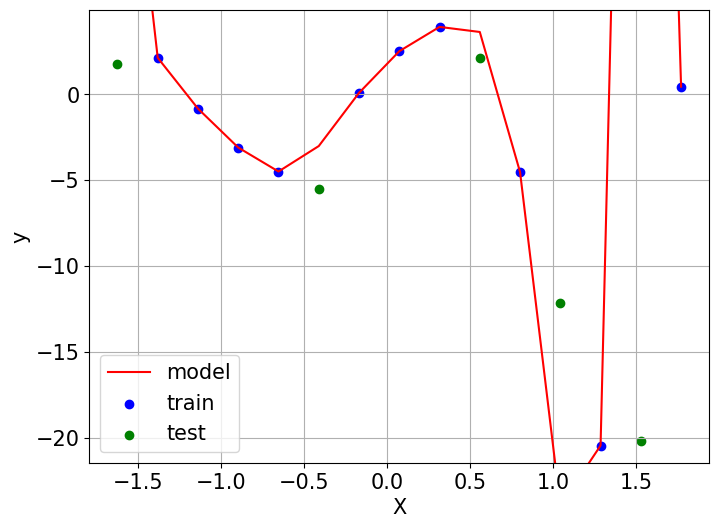

In [65]:
X_poly = creat_polynomial_features(X,N)
create_base_plot()
X_std = std.transform(X_poly)
plt.scatter(X_train_std[:,0], y_train, label="train",c="b")
plt.scatter(X_test_std[:,0], y_test, label="test",c="g")
plt.plot(X_std[:,0], lr.intercept_ + X_std@lr.coef_,label="model",c="r")
plt.legend()
plt.ylim([min(y)-1, max(y)+1])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Видно, что полиномиальная модель прошла через каждую точку из обучающей выборки, но для некоторых тестовых точек она делает значительную ошибку.

Такая ситуация является *переобучением*.

В некоторых местах многочлен уходит далеко вниз или далеко вверх. Давайте посомтрим на коэффициенты такого многчлена $\Theta$:

In [67]:
print(lr.coef_)

[-4.53463308e+00 -4.53463236e+00  6.73094965e+01 -1.26089058e+03
  7.99229786e+03 -1.88663647e+04  1.24575201e+04  1.15260770e+04
 -5.93052877e+03 -1.29395908e+04 -5.74089956e+03  5.99094428e+03
  1.19264843e+04  6.38409816e+03 -1.15982135e+04]


Коэффициенты очень большие. 

Это наводит на мысль, что большие коэффициенты характерны для переобучения

Давайте вспомним, какую функцию мы оптимизировали при обучении линейной регрессии:
\begin{equation*}
L(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(\tilde{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2}
\end{equation*}

Но теперь мы знаем, что большие веса $\Theta$ нам не подходят, они приводят к переобучению. 

Давайте введем ограничение на их размер

Так как мы минимизируем функцию ошибки, давайте заодно и минимизировать сумму весов:

\begin{equation*}
L(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(X_i\Theta - y_i)^2} + \lambda\sum_{j=1}^{k}\theta_j
\end{equation*}
$\lambda$ - гиперпараметр: насколько сильно мы уделяем внимамние именно минимизации весов.

Такая процедура называется **регуляризация**.

Но так как веса могут быть с разными знаками, то как и в случае с оптимизации линейной регрессии у нас появляется 2 выхода:
* оптимизировать сумму квадратов весов $-$ $L_2$ регуляризация (*RIDGE*)
* оптимизировать сумму модулей весов$-$ $L_1$ регуляризация (*LASSO*)

Оказывается эти 2 случая приводят к разным результатам:
1. $L_2$ регуляризация - приближает все веса модели к нулю.

2. $L_1$ регуляризация - обнуляет наименее важные веса, делает отбор признаков.


$L_2:$
\begin{equation*}
L(\Theta)_{RIDGE} = \dfrac{1}{N}\sum_{i=1}^{N}{(X_i\Theta - y_i)^2} + \lambda\sum_{j=1}^{k}\theta_j^2
\end{equation*}

$L_1:$
\begin{equation*}
L(\Theta)_{LASSO} = \dfrac{1}{N}\sum_{i=1}^{N}{(X_i\Theta - y_i)^2} + \lambda\sum_{j=1}^{k}|\theta_j|
\end{equation*}

Заметим, что сумма у регуляризации начинается от 1, в наших обозначениях это значит, что коэффициент свободного члена не участвует в регуляризации.

Выполним L2-регуляризацию

In [22]:
lr_reg = linear_model.Ridge(alpha=0.0010) # Это линейная модель с регуляризацией
N = 15
X_poly_train = creat_polynomial_features(X_train,N)
X_poly_test = creat_polynomial_features(X_test,N)

X_train_std = std.fit_transform(X_poly_train)
X_test_std = std.transform(X_poly_test)

lr_reg.fit(X_train_std,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

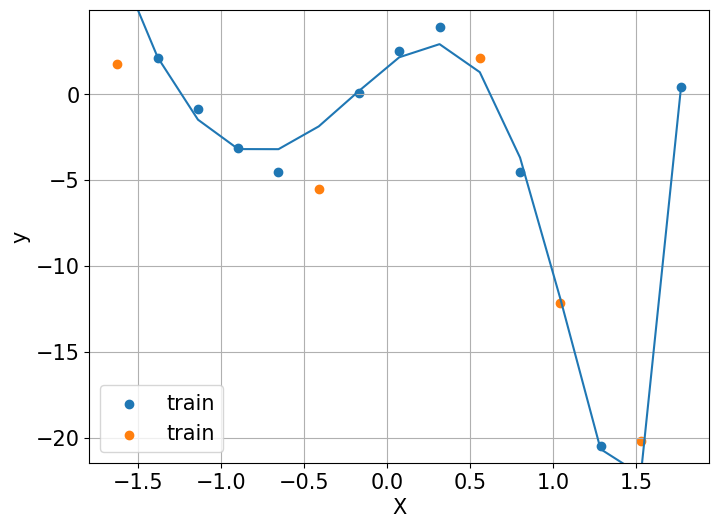

In [23]:
X_poly = creat_polynomial_features(X,N)
create_base_plot()
X_std = std.transform(X_poly)
plt.scatter(X_train_std[:,0], y_train, label="train")
plt.scatter(X_test_std[:,0], y_test, label="train")
plt.plot(X_std[:,0], lr_reg.intercept_ + X_std@lr_reg.coef_)
plt.legend()
plt.ylim([min(y)-1, max(y)+1])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Сдержав рост коэффициентов, даже при большой емкости модели мы избавились от переобучения.


Коэфициенты:

In [24]:
print(lr_reg.coef_)

[ -7.23642474  -7.23642474  49.27060078  -8.02020191 -33.20731749
 -28.66532664 -13.76270999   0.34816079   9.6519192   13.762298
  13.67837653  10.69195085   5.9486668    0.32274198  -5.57717401]


#### Логистическая регрессия

Для этого слегка модифицируем известную задачу классификации с датасетом "луны" (moons)

In [78]:
X,y = get_data_moon()

Отборазим:

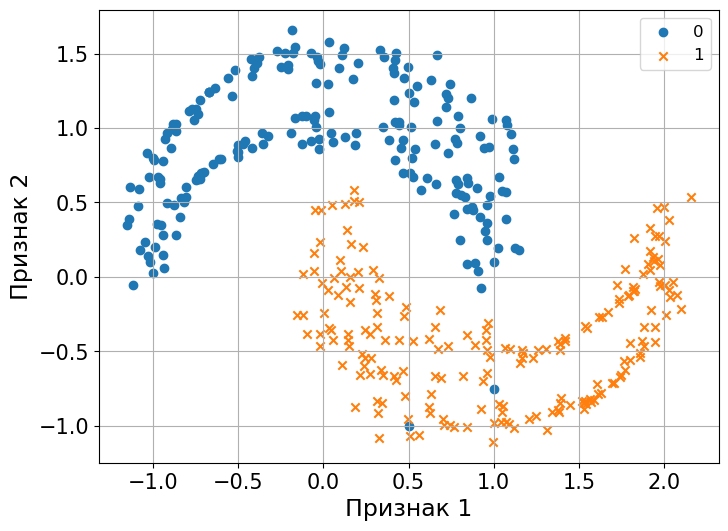

In [79]:
plot_data_moon(X,y)

Как видите, мы намеренно вставили два примера класса 0 внутрь класса 1, то есть получили типичную ситуацию - неверно разметили данные.

Здесь мы не будем разделять на тестовую и обучающую выборки, ограничившись изображением областей принятия решений

Обучим логистическую регрессию на "сырых" данных:

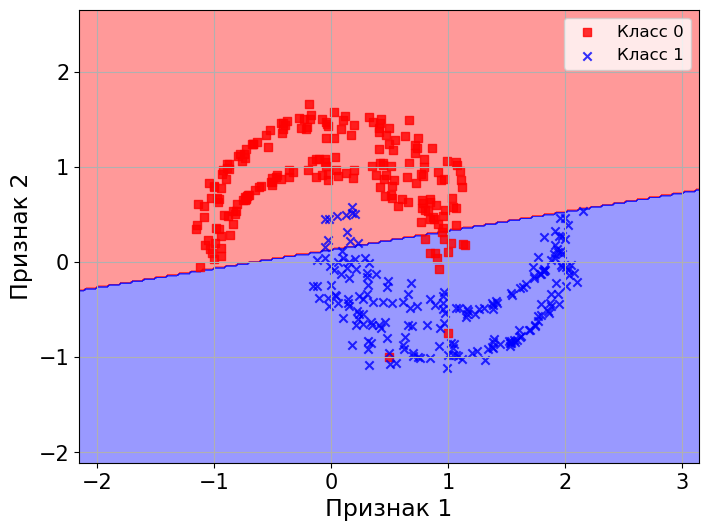

In [80]:
N = 1
X_poly= poly(X,N)
model_LogRegr_0 = LogisticRegression(penalty="none",solver="newton-cg")
model_LogRegr_0.fit(X_poly,y)
plot_decision_regions_binary(X, y, classifier=model_LogRegr_0 ,N = N)

Как и ожидалось, модель слишком слабая. Разделение получилось довольно невнятным

Увеличим сложность модели за счет введения полиномиальных признаков. Возьмем полином достаточно большой, например, 7-ой степени:

In [81]:
N = 7
X_poly= poly(X,N)

In [82]:
print(X_poly.max())
print(X_poly.min())

216.9675615566623
-2.7087605195047773


Обучим модель и нарисуем области принятия решения:

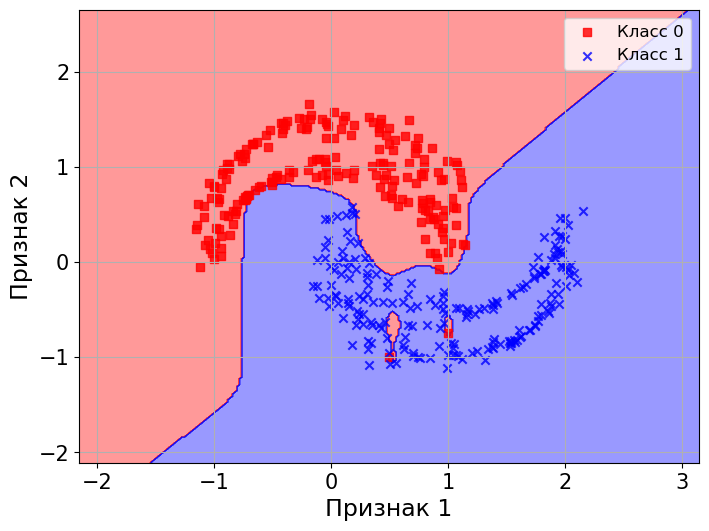

In [83]:
model_LogRegr = LogisticRegression(penalty="none",solver="newton-cg")
model_LogRegr.fit(X_poly,y)
plot_decision_regions_binary(X, y, classifier=model_LogRegr , test_idx=None, resolution=0.02,N = N)

Как видно, тренировочная выборка разделилась идеально, оба наших ошибочных примера классифицируются в соответствии с их метками класса (ошибочными)

Ситуация точно такая же как и в регрессии: большая степень полинома обеспечивает максимально точную аппроксимацию тренировочных данных, что приведет к ошибкам, по крайней мере, в тех областях, которые помечены розовыми "каплями". На лицо явное переобучение.

Выведем коэффициенты логистической регрессии:


In [84]:
print(model_LogRegr.coef_)

[[-4.01206782e+03 -1.05019791e+03 -4.17391500e+00 -1.40716102e+03
   8.10373774e+03  3.39489614e+03 -8.44518490e+02  6.21118497e+03
  -4.81943283e+03 -3.13133064e+03 -4.65646580e+03 -9.81333731e+03
   5.00414959e+03 -4.33016460e+03]]


Наши данные имеют диапазон значений от -2 до 200, а коэффиенты превосходят их на один-два порядка, что наводит на те же мысли, что и в задаче регрессии: большие значения коэффициентов могут свидетельствовать о переобучении.

Справится ли регуляризация? 

Регуляризация для логистической модель точно так же добавляет к функции потерь (в данном случае кросс-энтропия) сумму квадратов весов ($L_2$-регуляризация) или сумму модулей ($L_1$-регуляризация)

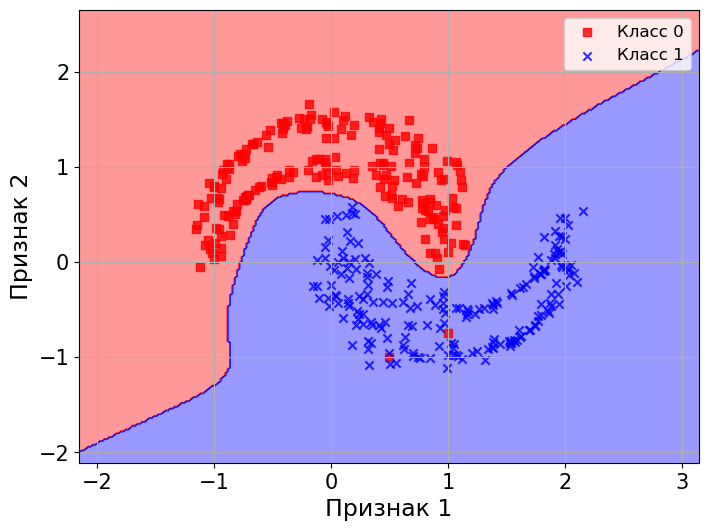

In [85]:
model_Regul = LogisticRegression(C = 100,solver="newton-cg") # Параметр C - регуляризация
model_Regul.fit(X_poly,y)
plot_decision_regions_binary(X, y, classifier=model_Regul , test_idx=None, resolution=0.02,N = N)

Похоже, регуляризация помогла. Линия разделения очень похожа на ожидаемую.

Выведем коэффициенты логистической регрессии:

In [86]:
print(model_Regul.coef_)

[[ -4.51391108  -9.04914044 -11.9911727    1.41000587   4.15797912
    4.35623998  -0.71446003  -6.84141347   4.44383881  -1.24272379
   -0.48615715  -2.97152046   0.40902851  -5.63436259]]


Коэффициенты пришли в норму, как и в линейной регрессии.

*Примечание*. В наших простых примерах регуляризация была необязательным компонентом. Действительно, достаточно было в задаче регрессии и классификации подобрать степень полинома так, чтобы ошибки на тестовой выборке для регрессии или разделяющая поверхность для классификации стали бы максимально приемлемыми. Но надо понимать, что в реальных задачах подбор степени может быть крайне трудоемкой задачей. Здесь же продемонстрировано, что для решения задачи можно выбрать заведомо емкую модель и лишь ограничивать ее коэффициенты регуляризацией. Именно так и обстоят дела в реальных задачах с моделями огромных емкостей, о которых мы поговорим в соответствующих разделах нашего курса.